In [293]:
import pandas as pd

In [294]:
import numpy as np

In [295]:
import sqlite3

In [296]:
df = pd.read_csv('Downloads/Exploring Trends in the Automotive Industry.csv')

In [297]:
df = df.iloc[:,:-3]

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           8148 non-null   object 
 1   year           8148 non-null   float64
 2   selling_price  8148 non-null   float64
 3   km_driven      8157 non-null   object 
 4   fuel           8148 non-null   object 
 5   seller_type    8148 non-null   object 
 6   transmission   8148 non-null   object 
 7   owner          8148 non-null   object 
 8   mileage        7928 non-null   object 
 9   engine         7927 non-null   object 
 10  max_power      7933 non-null   object 
 11  torque         7926 non-null   object 
 12  seats          7927 non-null   float64
dtypes: float64(3), object(10)
memory usage: 828.8+ KB


In [299]:
df.describe()

,year,selling_price,seats
count,8148.000000,8.148000e+03,7927.000000
mean,2013.824006,6.401217e+05,5.415668
std,4.059542,8.085638e+05,0.958604
min,1983.000000,2.999900e+04,2.000000
25%,2011.000000,2.549990e+05,5.000000
50%,2015.000000,4.500000e+05,5.000000
75%,2017.000000,6.750000e+05,5.000000
max,2023.000000,1.000000e+07,14.000000


In [300]:
df.isnull().sum()

Name              11
year              11
selling_price     11
km_driven          2
fuel              11
seller_type       11
transmission      11
owner             11
mileage          231
engine           232
max_power        226
torque           233
seats            232
dtype: int64

In [301]:
df = df.dropna()

In [302]:
df.head(3)

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023.0,410000.0,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023.0,1350000.0,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023.0,5800000.0,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0


In [303]:
# df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'], drop_first=True)
#Label encoding or one-hot encoding
# LabelEncoder from
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of columns to convert
columns_to_convert = ['fuel', 'seller_type', 'transmission', 'owner']

# Convert each column in the list to integers
for col in columns_to_convert:
    df[col] = label_encoder.fit_transform(df[col])

# Display the modified DataFrame
print(df)

                                                Name    year  selling_price  \
0                            Maruti Alto 800 LXI Opt  2023.0       410000.0   
1                      Skoda Slavia 1.0 TSI Ambition  2023.0      1350000.0   
2      BMW 3 Series Gran Limousine 320Ld Luxury Line  2023.0      5800000.0   
3                                 MG ZS EV Exclusive  2023.0      2650000.0   
4                               Tata Punch Adventure  2023.0       715000.0   
...                                              ...     ...            ...   
8139                                   Maruti 800 AC  1996.0        42000.0   
8140                                   Maruti 800 DX  1996.0        40000.0   
8142                                  Maruti 800 Std  1995.0        55000.0   
8143               Ambassador Classic 2000 DSZ AC PS  1994.0        99000.0   
8145                                   Maruti 800 AC  1994.0        45000.0   

     km_driven  fuel  seller_type  transmission  ow

In [304]:

df.head(2)

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023.0,410000.0,10000,4,1,1,0,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023.0,1350000.0,10000,4,1,1,0,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0


In [305]:
# Create new feature 'car_age'
df['car_age'] = 2024 - df['year']

In [306]:
#df['mileage'] = df['mileage'].str.replace('kmpl', '').astype(float)
df['mileage'] = df['mileage'].astype(str)


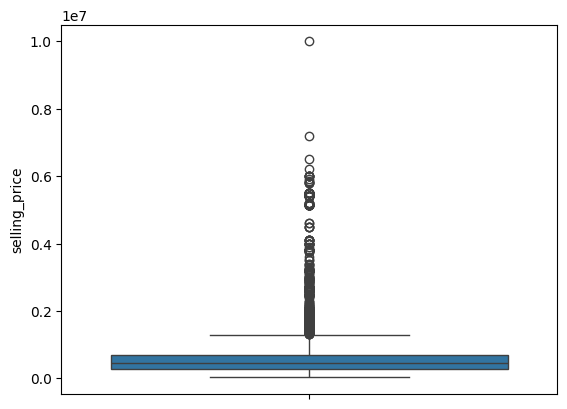

In [307]:
# Check for outliers in important numerical columns 
# km_driven and selling_price and handle them if necessary (using methods like capping, trimming, or using robust scaling).
# Visualize the distribution of 'selling_price' or 'km_driven'
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['selling_price'])

plt.show()

In [308]:
# Check the data types of the specified columns
print(df[['mileage', 'engine', 'max_power', 'torque', 'seats']].dtypes)

mileage       object
engine        object
max_power     object
torque        object
seats        float64
dtype: object


In [309]:
df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df['torque'] = df['torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['engine'] = df['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

In [310]:
df = df.drop(['Name'], axis=1)
#owner	mileage	engine	max_power	torque

In [311]:
from sklearn.model_selection import train_test_split
x = df.drop('selling_price', axis =1)
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [321]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
# 
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

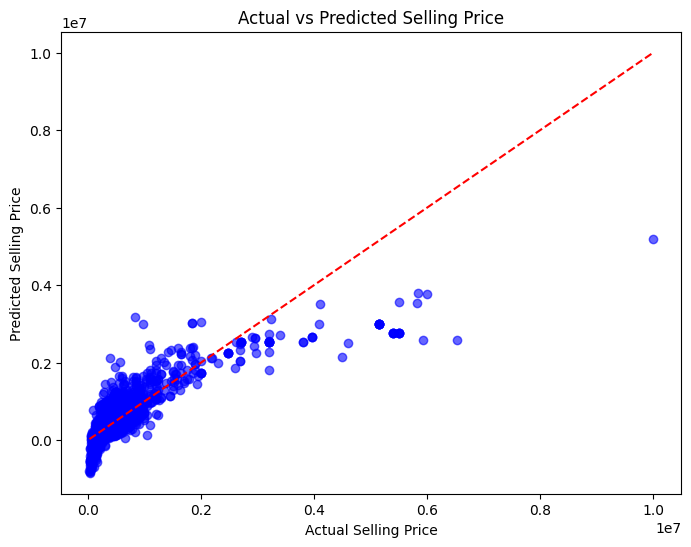

In [323]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

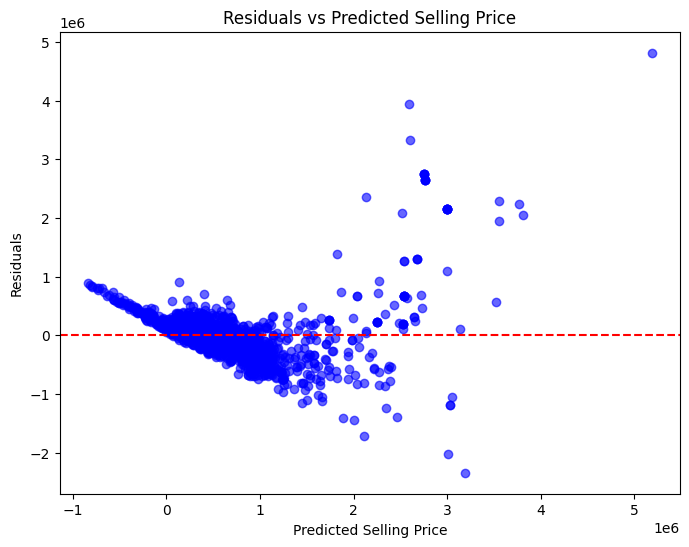

In [324]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Selling Price')
plt.show()

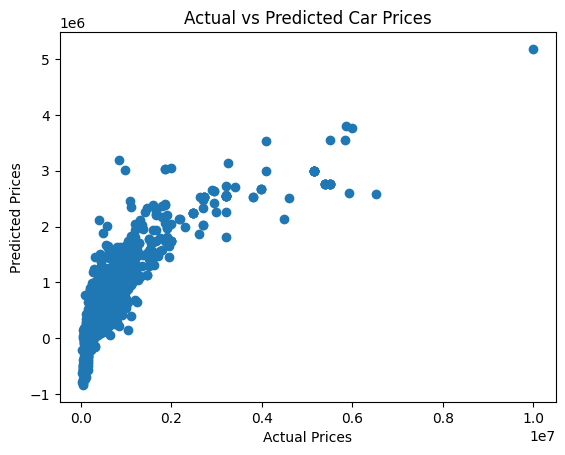

In [325]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

In [327]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [329]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(x_test)

# Evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MAE: 277932.3044792035
MSE: 229734911768.75458
R-squared: 0.6830240968146502


In [331]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning with GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [333]:
importances = rf_model.feature_importances_
feature_names = x.columns

# Sort and display feature importance
sorted_importances = sorted(zip(importances, feature_names), reverse=True)
for importance, name in sorted_importances:
    print(f"{name}: {importance:.4f}")

max_power: 0.7034
car_age: 0.1101
year: 0.0859
torque: 0.0308
km_driven: 0.0247
mileage: 0.0131
seller_type: 0.0106
engine: 0.0098
transmission: 0.0070
seats: 0.0024
owner: 0.0014
fuel: 0.0008


In [336]:
y_pred = rf_model.predict(x_test)

In [337]:
# Print actual vs predicted values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())  # Display the first few predictions


         Actual   Predicted
5053   235000.0   220819.99
315   1125000.0  1097770.00
4385   550000.0   577049.91
1288  1265000.0  1207650.00
2467   625000.0   625000.00


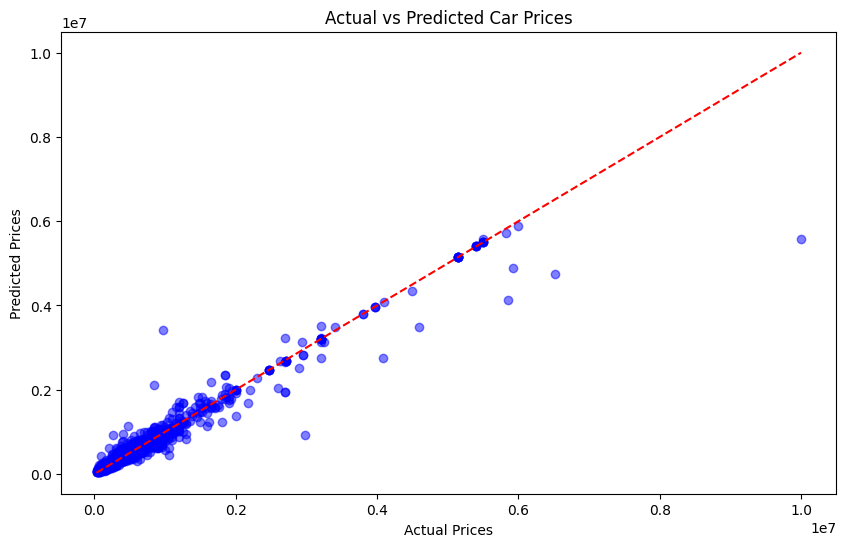

In [338]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

In [339]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 75030.15031868941
Mean Squared Error (MSE): 37797572605.34589
R-squared: 0.9478489376187933


In [342]:
# Correct way to create car_age feature after splitting
x_train['car_age'] = 2024 - x_train['year']
x_test['car_age'] = 2024 - x_test['year']

In [344]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data only
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Transform test data using the same scaler (no fitting on test set)
x_test_scaled = scaler.transform(x_test)


In [345]:
# Fit encoder on training data
x_train_encoded = pd.get_dummies(x_train, columns=['fuel', 'seller_type'])

# Apply the same encoding to test data (use columns in training)
x_test_encoded = pd.get_dummies(x_test, columns=['fuel', 'seller_type'])


In [346]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation on training data
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [-73399.30480373 -67331.12669802 -69889.47480265 -80175.23073695
 -73034.90317114]


In [350]:
cv_scores_positive = -cv_scores
print(cv_scores_positive)

[73399.30480373 67331.12669802 69889.47480265 80175.23073695
 73034.90317114]


In [351]:
import numpy as np

# Convert to positive values
cv_scores_positive = -cv_scores

# Calculate mean and standard deviation of MAE
mean_mae = np.mean(cv_scores_positive)
std_mae = np.std(cv_scores_positive)

print(f"Mean MAE: {mean_mae}")
print(f"Standard Deviation of MAE: {std_mae}")

Mean MAE: 72766.00804249881
Standard Deviation of MAE: 4316.997313468554


In [352]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

R-squared (R²): 0.9478489376187933
